# Social Distancing

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xbbg import blp

In [25]:
def GetRet(Liste, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d"), EquiW = True):
    Res = blp.bdh(tickers= [x + " Equity" for x in Liste],start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    if EquiW == True:
        Ret = Ret.T.mean()
    return Ret

def Plot(Ret):
    print("Sharpe", np.sqrt(252) * Ret.mean()/Ret.std())
    Ret = Ret + 1
    if type(Ret) == type(pd.Series(0)):
        Ret[0] = 100
    else:
        Ret.iloc[0,0] = 100
    plt.plot(Ret.cumprod())
    plt.xticks(rotation = 45)
    plt.show()
    return "Plot!"

In [26]:
Long = ["AMZN US", "NFLX US", "PTON US", "APRN US", "GRUB US", "ATVI US", "CLX US", "ZM US", "COST US", "WMT US"]
Short = ["UAL US", "WELL US", "UBER US", "MAR US", "MGM US", "M US", "CNK US", "MCD US"]

In [27]:
LLeg = GetRet(Long, Start = "20200101", End = pd.to_datetime("today").strftime("%Y%m%d"), EquiW = True)

In [28]:
SLeg = GetRet(Short, Start = "20200101", End = pd.to_datetime("today").strftime("%Y%m%d"), EquiW = True)

Sharpe 4.480677091972458


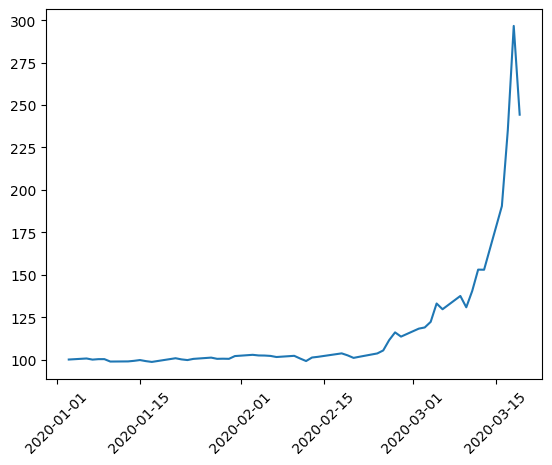

'Plot!'

In [29]:
Plot(LLeg - SLeg)

Sharpe 1.1237635556421388


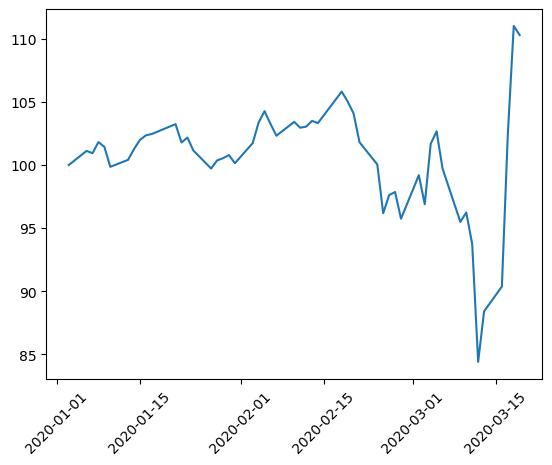

'Plot!'

In [30]:
Plot(LLeg)

Sharpe -4.444932517743619


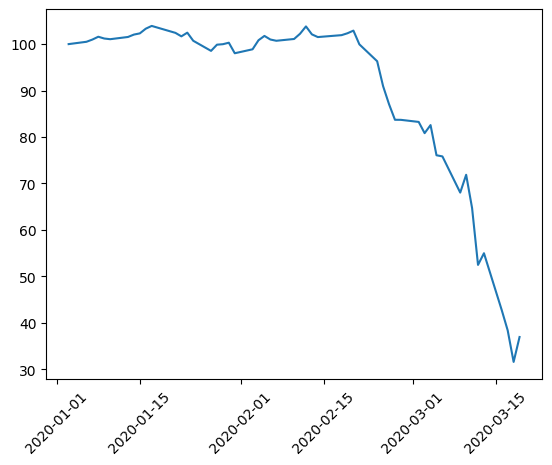

'Plot!'

In [31]:
Plot(SLeg)